In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install ipyplot

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.utils import shuffle
import ipyplot
from tensorflow.keras.layers import*
from tensorflow.keras.models import*
from tensorflow.keras.losses import*
from tensorflow.keras.optimizers import*
import os
import math
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
import random
import cv2 as cv



        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `force_b64` param to `True`.
        


In [ ]:
dataset_train = ("/content/drive/MyDrive/lab14ai/dataset/train")
dataset_validate =("/content/drive/MyDrive/lab14ai/dataset/val")
dataset_test = ("/content/drive/MyDrive/lab14ai/dataset/test")


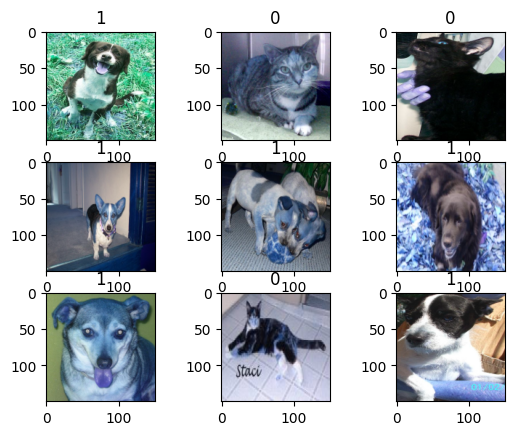

In [ ]:
CATEGORIES = ["Cat", "Dog"]
train_data = []

for category in CATEGORIES:
    # each category into a unique integer
    label = CATEGORIES.index(category)  # cats label = 0 and dogs label = 1
    path = os.path.join(dataset_train, category)

    for img_file in os.listdir(path):
        img = cv.imread(os.path.join(path, img_file), 1)
        if img is not None:
            imag = cv.resize(img, (150, 150), interpolation=cv.INTER_AREA)
            train_data.append((imag, label))

# shuffle the dataset for good results
random.shuffle(train_data)

# let's separate the image and target variable
train_X = []
train_y = []

for image, label in train_data:
    train_X.append(image)
    train_y.append(label)

train_X = np.array(train_X).reshape(-1, 150, 150, 3).astype('float32') / 255.0

# let's see our data
for i in range(9):
    plt.figure(1)
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_X[i])
    plt.title(train_y[i])

plt.show()


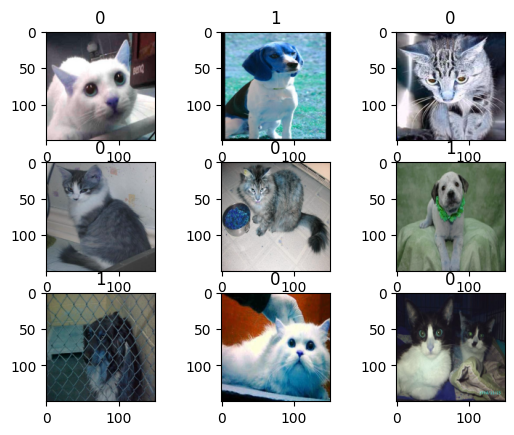

In [ ]:
CATEGORIES = ["Cat", "Dog"]
val_data = []

for category in CATEGORIES:
    # each category into a unique integer
    label = CATEGORIES.index(category)  # cats label = 0 and dogs label = 1
    path = os.path.join(dataset_validate, category)

    for img_file in os.listdir(path):
        img = cv.imread(os.path.join(path, img_file), 1)
        if img is not None:
            imag = cv.resize(img, (150, 150), interpolation=cv.INTER_AREA)
            val_data.append((imag, label))

# shuffle the dataset for good result
random.shuffle(val_data)

# lets separate the image and target variable
val_X = []
val_y = []

for image, label in val_data:
    val_X.append(image)
    val_y.append(label)

val_X = np.array(val_X).reshape(-1, 150, 150, 3).astype('float32') / 255.0
for i in range(9):
    plt.figure(2)
    plt.subplot(3,3,i+1)
    plt.imshow(val_X[i])
    plt.title(val_y[i])

plt.show()


Error: Unable to read image at path /content/drive/MyDrive/lab14ai/dataset/test/Cat/7978.jpg
Error: Unable to read image at path /content/drive/MyDrive/lab14ai/dataset/test/Cat/9171.jpg
Error: Unable to read image at path /content/drive/MyDrive/lab14ai/dataset/test/Dog/10158.jpg
Error: Unable to read image at path /content/drive/MyDrive/lab14ai/dataset/test/Dog/10401.jpg
Error: Unable to read image at path /content/drive/MyDrive/lab14ai/dataset/test/Dog/11675.jpg
Error: Unable to read image at path /content/drive/MyDrive/lab14ai/dataset/test/Dog/11849.jpg
Error: Unable to read image at path /content/drive/MyDrive/lab14ai/dataset/test/Dog/7369.jpg


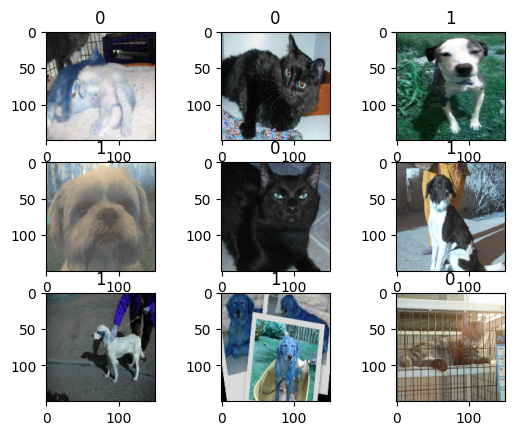

In [ ]:
CATEGORIES = ["Cat", "Dog"]
test_data = []

for category in CATEGORIES:
    # each category into a unique integer
    label = CATEGORIES.index(category)  # cats label = 0 and dogs label = 1
    path = os.path.join(dataset_test, category)

    for img_file in os.listdir(path):
        img = cv.imread(os.path.join(path, img_file), 1)
        if img is not None:
            imag = cv.resize(img, (150, 150), interpolation=cv.INTER_AREA)
            test_data.append((imag, label))

# shuffle the dataset for good result
random.shuffle(test_data)

# lets separate the image and target variable
test_X = []
test_y = []

for image, label in test_data:
    test_X.append(image)
    test_y.append(label)

test_X = np.array(test_X).reshape(-1, 150, 150, 3).astype('float32') / 255.0


#lets see our data
for i in range(9):
 plt.figure(1)
 plt.subplot(3,3,i+1)
 plt.imshow(test_X[i])
 plt.title(test_y[i])

plt.show()

In [ ]:
classes = 2

#model

inputs = Input((150,150,3))

conv1 = Conv2D(32,3,activation = 'relu', padding = 'same')(inputs)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)

conv2 = Conv2D(64,3,activation = 'relu', padding = 'same')(pool1)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2)

conv3 = Conv2D(128,3,activation = 'relu', padding = 'same')(pool2)
pool3 = MaxPooling2D(pool_size=(2,2))(conv3)

conv4 = Conv2D(128,3,activation = 'relu', padding = 'same')(pool3)
pool4 = MaxPooling2D(pool_size=(2,2))(conv4)
flatten = Flatten()(pool4)
dense1 = Dense(1024, activation='relu', name='Dense_1')(flatten)
output = Dense(1, activation='sigmoid', name='Output')(dense1)

my_model = Model(inputs = [inputs], outputs=[output])

my_optimiser = Adam(lr = 0.00001)
my_model.compile(loss='binary_crossentropy',optimizer = my_optimiser,metrics = ['accuracy'])
print("done")
my_model.summary()





done
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       7

In [ ]:
def decaying_cosine_annealing_scheduler(epoch):
    """
        A step rate scheduler for setting the learning rate for each epoch.
        :param epoch: current epoch
        :return: learning rate for current epoch
        """
    learning_rate_min = 1e-6
    original_learning_rate_max = 1e-3
    original_cycle_length = 15
    epochs_per_cycle = original_cycle_length-(int(epoch/original_cycle_length))
    learning_rate_max = original_learning_rate_max/((int(epoch/original_cycle_length))+1)
    #print(learning_rate_max,learning_rate_min, epoch, epochs_per_cycle)

    return learning_rate_min + (learning_rate_max - learning_rate_min) * \
           (1 + math.cos(math.pi * (epoch % epochs_per_cycle) / epochs_per_cycle)) / 2

In [ ]:
major_revision, minor_revision = 1,1
model_save_path = "/content/drive/MyDrive/Colab Notebooks/ai_lab/"
log_save_path =  "/content/drive/MyDrive/Colab Notebooks/ai_logs/"


file_path = os.path.join(model_save_path, 'm%i-%i.h5' % (major_revision, minor_revision))
checkpoints_callback = tf.keras.callbacks.ModelCheckpoint(file_path, monitor= 'accuracy', verbose = 1, mode='max', save_best_only=True, save_freq='epoch')

learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(decaying_cosine_annealing_scheduler, verbose=True)

file = open(os.path.join(log_save_path, 'log-%i-%i.txt' % (major_revision, minor_revision)),'a+')

text_logging_callback = tf.keras.callbacks.LambdaCallback(
on_epoch_end=lambda epoch, logs: file.write('####EPOCH %i\n' % (epoch + 1) + '#### VALIDATION ACCURACY =%.5f \n' % logs['accuracy'])
)

my_callbacks = [checkpoints_callback, learning_rate_callback, text_logging_callback]

In [ ]:
training_labels = np.array(train_y)
val_labels = np.array(val_y)

In [ ]:
val_labels.shape

(2544,)

In [ ]:
train_X.shape

(8782, 150, 150, 3)

In [ ]:
val_labels = val_labels.reshape((-1, 2))
training_labels =training_labels.reshape((-1, 2))


In [ ]:
val_labels.shape

(1272, 2)

In [ ]:
# Train the model with default learning rate, 30 epochs, and batch size of 15
batch_size = 15
epochs = 30

my_model_history = my_model.fit(
    x=train_X, y=training_labels,  # Convert input data to numpy array
    epochs=epochs,
    validation_data=(val_X, val_labels),  # Convert validation data to numpy array
    batch_size=batch_size
)

Epoch 1/30
586/586 [==============================] - 21s 24ms/step - loss: 0.6800 - accuracy: 0.5763 - val_loss: 0.6629 - val_accuracy: 0.6219
Epoch 2/30
586/586 [==============================] - 11s 19ms/step - loss: 0.6141 - accuracy: 0.6694 - val_loss: 0.5953 - val_accuracy: 0.6828
Epoch 3/30
586/586 [==============================] - 12s 20ms/step - loss: 0.5393 - accuracy: 0.7279 - val_loss: 0.5253 - val_accuracy: 0.7378
Epoch 4/30
586/586 [==============================] - 11s 19ms/step - loss: 0.4814 - accuracy: 0.7677 - val_loss: 0.5029 - val_accuracy: 0.7528
Epoch 5/30
586/586 [==============================] - 12s 20ms/step - loss: 0.4142 - accuracy: 0.8033 - val_loss: 0.4798 - val_accuracy: 0.7756
Epoch 6/30
586/586 [==============================] - 11s 20ms/step - loss: 0.3468 - accuracy: 0.8450 - val_loss: 0.4999 - val_accuracy: 0.7854
Epoch 7/30
586/586 [==============================] - 12s 20ms/step - loss: 0.2647 - accuracy: 0.8866 - val_loss: 0.6007 - val_accuracy:

In [ ]:
test_labels = np.array(test_y)

my_predictions = my_model.predict(test_X)
print(my_predictions.shape)
classes = ['Cats','Dogs']
cmd = ConfusionMatrixDisplay((confusion_matrix(list(np.argmax(test_labels, axis=1)), list(np.argmax(my_predictions, axis=1)))), display_labels=classes)
cmd.plot()
plt.show()